In [25]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
data_loc = '/project/wyin/jlee/ml-project/dos-prediction-full/data'
root = '/project/wyin/jlee/ml-project'
util_loc = os.path.join(root, "utils")
sys.path.append(util_loc)
print(os.getcwd())
from forward_utilities import ScaledData
import time

/project/wyin/jlee/ml-project/dos-prediction-full/nearest-neighbors


In [2]:
train_set = np.load(os.path.join(data_loc, 'train-set.npz'))
train_params = train_set['params']
train_dos = train_set['dos']

In [3]:
val_set = np.load(os.path.join(data_loc, 'val-set.npz'))
val_params = val_set['params']
val_dos = val_set['dos']

In [4]:
test_set = np.load(os.path.join(data_loc, 'test-set.npz'))
test_params = test_set['params']
test_dos = test_set['dos']

In [5]:
scaler = StandardScaler()
train_params_scaled = scaler.fit_transform(train_params)
val_params_scaled = scaler.transform(val_params)

In [6]:
knn_mse_uniform = []
for i in range(1, 20):
    print(f"trying n neights = {i}")
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(train_params_scaled, train_dos)
    predicted = neigh.predict(val_params_scaled)
    
    mse = np.mean((val_dos - predicted)**2)
    knn_mse_uniform.append(mse)

knn_mse_uniform = np.array(knn_mse_uniform)

trying n neights = 1
trying n neights = 2
trying n neights = 3
trying n neights = 4
trying n neights = 5
trying n neights = 6
trying n neights = 7
trying n neights = 8
trying n neights = 9
trying n neights = 10
trying n neights = 11
trying n neights = 12
trying n neights = 13
trying n neights = 14
trying n neights = 15
trying n neights = 16
trying n neights = 17
trying n neights = 18
trying n neights = 19


5.1602937422550505e-05
4


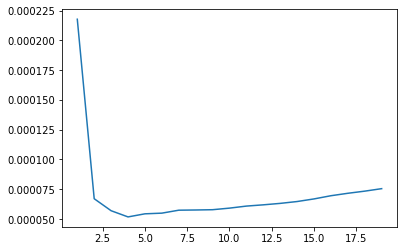

In [10]:
plt.plot(np.arange(1, 20), knn_mse_uniform)
print(np.min(knn_mse_uniform))
print(np.argmin(knn_mse_uniform) + 1)

In [7]:
knn_mse_weighted = []
for i in range(1, 20):
    print(f'trying n neighs = {i}')
    neigh = KNeighborsRegressor(n_neighbors = i, weights = 'distance')
    neigh.fit(train_params_scaled, train_dos)
    predicted = neigh.predict(val_params_scaled)
    
    mse = np.mean((val_dos - predicted)**2)
    knn_mse_weighted.append(mse)

knn_mse_weighted = np.array(knn_mse_weighted)

trying n neighs = 1
trying n neighs = 2
trying n neighs = 3
trying n neighs = 4
trying n neighs = 5
trying n neighs = 6
trying n neighs = 7
trying n neighs = 8
trying n neighs = 9
trying n neighs = 10
trying n neighs = 11
trying n neighs = 12
trying n neighs = 13
trying n neighs = 14
trying n neighs = 15
trying n neighs = 16
trying n neighs = 17
trying n neighs = 18
trying n neighs = 19


5.097274342037843e-05
4


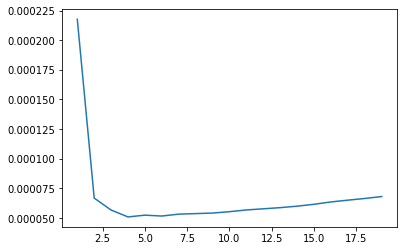

In [8]:
plt.plot(np.arange(1, 20), knn_mse_weighted)
print(np.min(knn_mse_weighted))
print(np.argmin(knn_mse_weighted) + 1)

In [9]:
knn_mse_weighted = []
def WeightFunc(distances):
    return distances ** -4
for i in range(1, 20):
    print(f'trying n neighs = {i}')
    neigh = KNeighborsRegressor(n_neighbors = i, weights = WeightFunc)
    neigh.fit(train_params_scaled, train_dos)
    predicted = neigh.predict(val_params_scaled)
    
    mse = np.mean((val_dos - predicted)**2)
    knn_mse_weighted.append(mse)

knn_mse_weighted = np.array(knn_mse_weighted)

trying n neighs = 1
trying n neighs = 2
trying n neighs = 3
trying n neighs = 4
trying n neighs = 5
trying n neighs = 6
trying n neighs = 7
trying n neighs = 8
trying n neighs = 9
trying n neighs = 10
trying n neighs = 11
trying n neighs = 12
trying n neighs = 13
trying n neighs = 14
trying n neighs = 15
trying n neighs = 16
trying n neighs = 17
trying n neighs = 18
trying n neighs = 19


4.904704271419628e-05
6


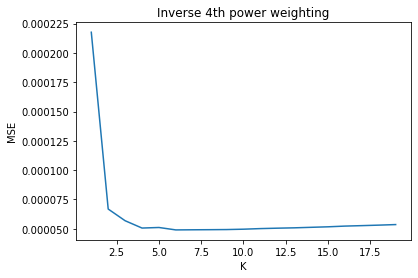

In [10]:
plt.plot(np.arange(1, 20), knn_mse_weighted)
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("Inverse 4th power weighting")
print(np.min(knn_mse_weighted))
print(np.argmin(knn_mse_weighted) + 1)

In [32]:
test_params_scaled = scaler.transform(test_params)


neigh = KNeighborsRegressor(n_neighbors = 6, weights = WeightFunc)
neigh.fit(train_params_scaled, train_dos)
predicted = neigh.predict(test_params_scaled)

mse = np.mean((test_dos - predicted)**2)
mae = np.mean(np.abs(test_dos - predicted))
print(f"Testing data mse: {mse}")
print(f"Testing data mae: {mae}")

Testing data mse: 4.7089880278709533e-05
Testing data mae: 0.001390832279227685


In [34]:
#Time test
start_time = time.time()
all_data = ScaledData(data_loc)

train_predicted = neigh.predict(all_data.train_params)
val_predicted = neigh.predict(all_data.val_params)
test_predicted = neigh.predict(all_data.test_params)
test_predicted = neigh.predict(all_data.test_params)

print(np.mean((test_predicted - all_data.test_dos)**2))
print(train_predicted.shape)
end_time = time.time()
print(end_time - start_time)

/tmp/ipykernel_85089/944398406.py:3: RuntimeWarning: divide by zero encountered in power
  return distances ** -4
/home/wyin/.conda/envs/ML-env/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:241: RuntimeWarning: invalid value encountered in true_divide
  y_pred[:, j] = num / denom


4.7089880278709533e-05
(106120, 301)
5.583005905151367


In [12]:
#Visualize test set results
mse_mat = (test_dos - predicted) ** 2
mse_list = np.mean(mse_mat, axis = 1)

mse_dos = list(zip(mse_list, predicted, test_dos))
mse_dos = sorted(mse_dos, reverse = True)
num_dos = len(mse_dos)

In [16]:
def plot_one(idx, ax, show_legend = False, title = None):
    ax.plot(np.linspace(-6, 6, 301), mse_dos[idx][1], label = 'Knn predicted', alpha = 0.5)
    ax.plot(np.linspace(-6, 6, 301), mse_dos[idx][2], label = 'SCBA', alpha = 0.5)
    if show_legend: ax.legend()
    if title != None: ax.set_title(title)
    #ax.text(0, 0.3, mse_dos[idx][0])
        

def plot_four(start_idx, title):
    fig, ax = plt.subplots(2, 2, figsize = (15, 10))
    
    plot_one(start_idx, ax[0][0], show_legend = True)
    plot_one(start_idx + 1, ax[0][1])
    plot_one(start_idx + 2, ax[1][0])
    plot_one(start_idx + 3, ax[1][1])
        
    plt.suptitle(title, fontsize=14)

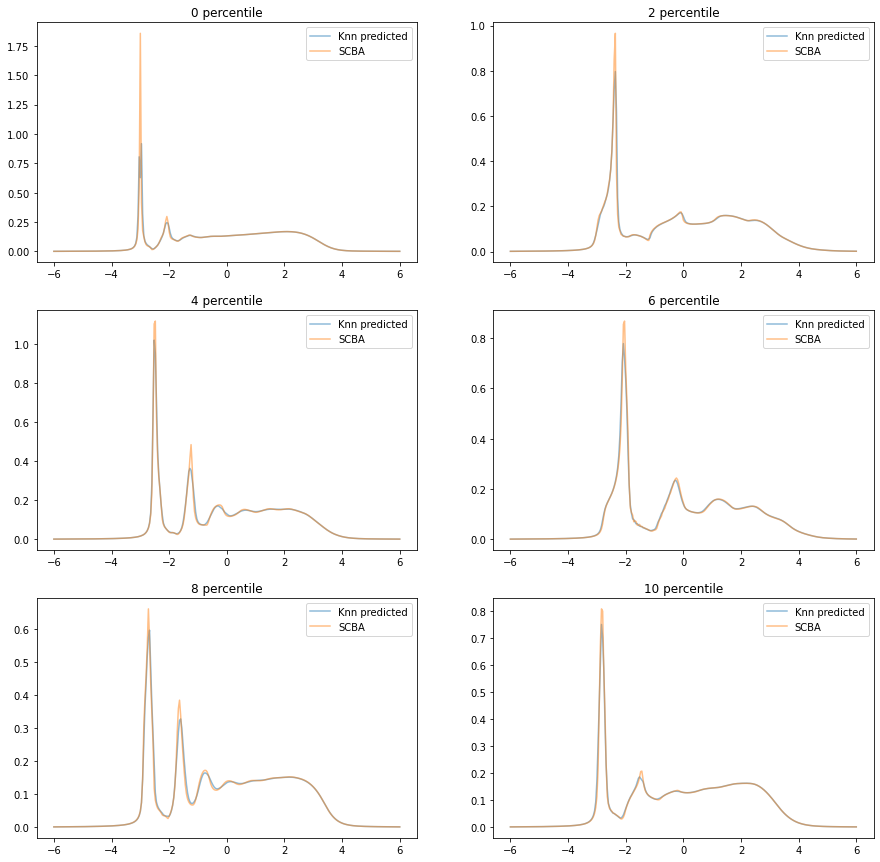

In [17]:
#6 worst percentiles
fig, ax = plt.subplots(3, 2, figsize = (15, 15))
for i in range(3):
    for j in range(2):
        percentile = 2 * (i * 2 + j)
        plot_one(percentile * (num_dos // 100), ax[i][j], True, f"{percentile} percentile")

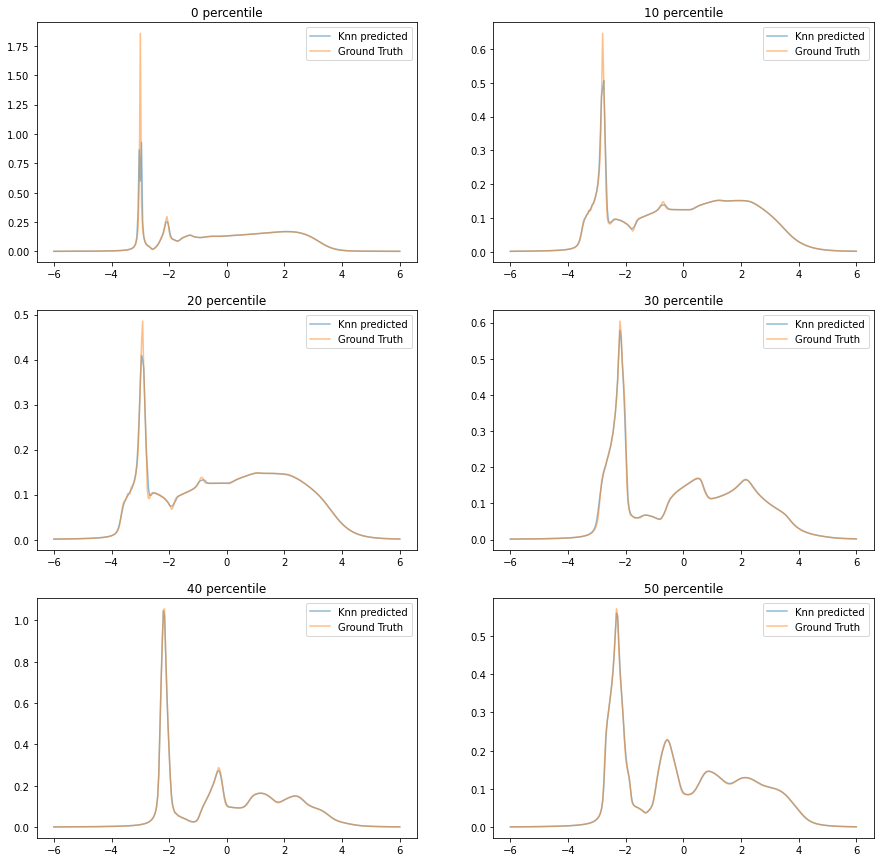

In [24]:
fig, ax = plt.subplots(3, 2, figsize = (15, 15))
for i in range(3):
    for j in range(2):
        percentile = i * 20 + j * 10
        plot_one(percentile * (num_dos // 100), ax[i][j], True, f"{percentile} percentile")
    

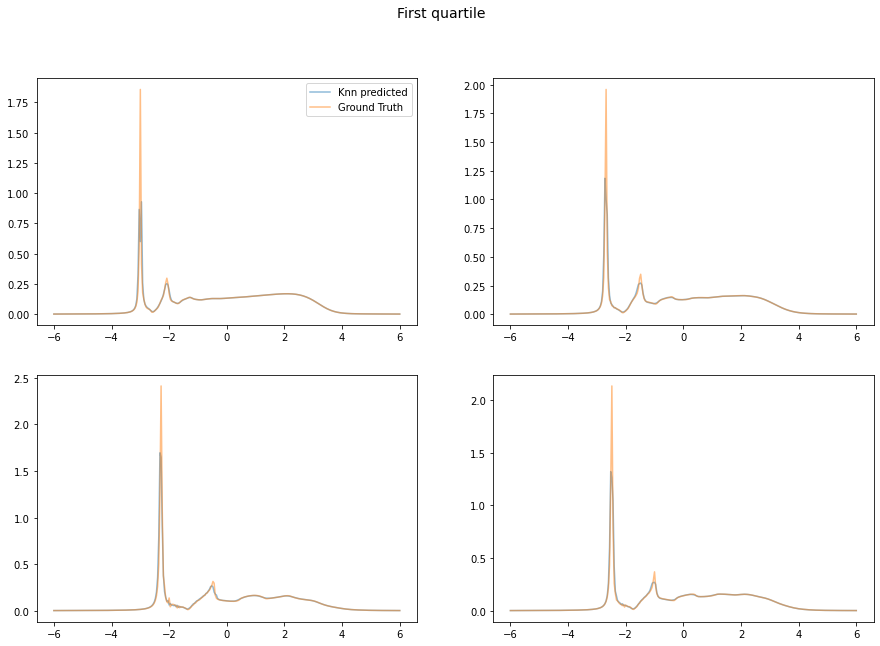

In [91]:
plot_four(0, "First quartile")

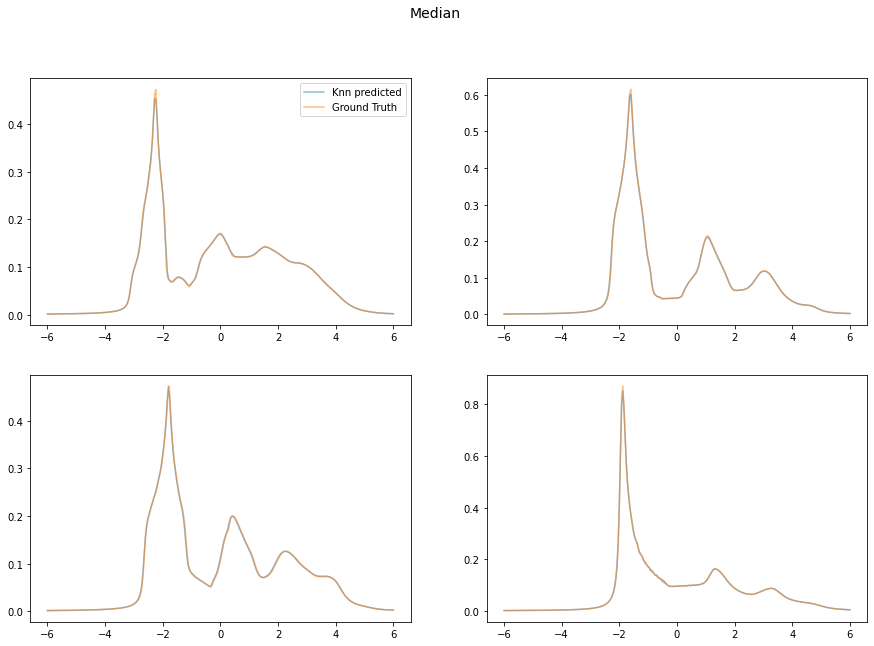

In [76]:
plot_four(num_dos // 2 - 2, "Median")

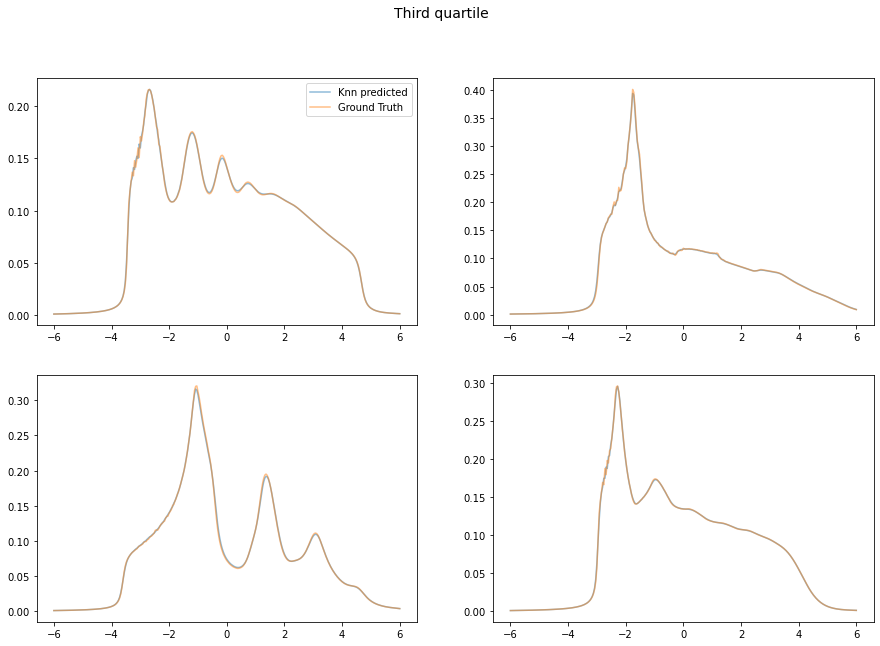

In [79]:
plot_four(3 * num_dos // 4 - 2, "Third quartile")

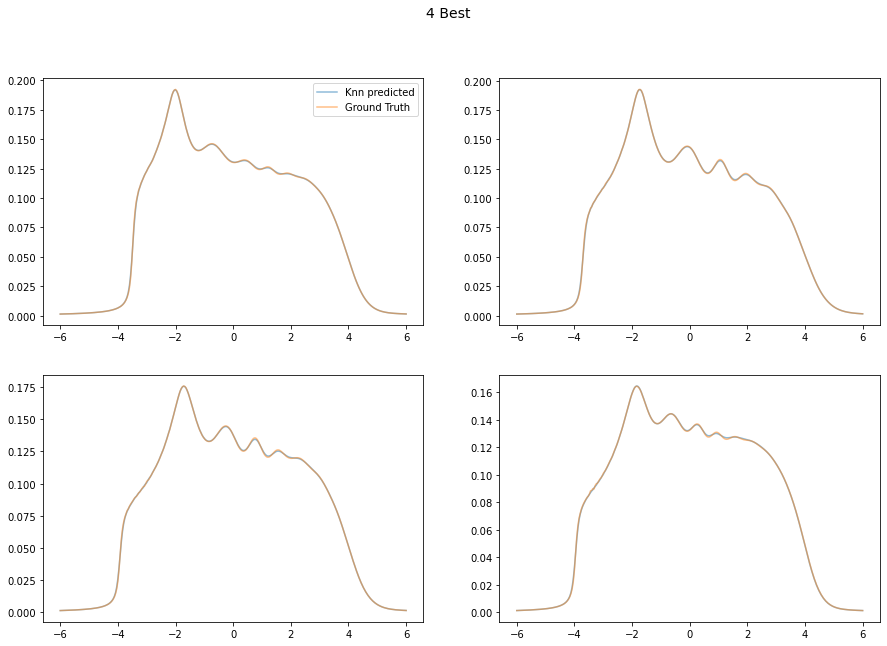

In [81]:
plot_four(num_dos - 4, "4 Best")